<a href="https://colab.research.google.com/github/dsp196/Internshala_assignments/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing required libraries 
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

from keras.datasets import cifar10

In [ ]:
(trainX, trainy), (testX, testy) = cifar10.load_data() #Train loader and Test loader 
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape)) 
#Normalizing Training Data
train_norm_x = trainX/255.0
test_norm_x =testX/255.0

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


In [ ]:
#HyperParameters for training
LEARNING_RATE =0.001
EPOCHS=50

In [ ]:
classes = [0,1,2,3,4,5,6,7,8,9]
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


class_dict = dict(zip(classes, class_names))

In [ ]:
class ModelA():
    
  def create_model_NetA(self):
    NnetA = tf.keras.Sequential(name="NetA")
    NnetA.add(layers.Flatten(input_shape = (32,32,3) ))
    NnetA.add(layers.Dense(10,activation='linear'))
    return NnetA
  



In [ ]:
class ModelB():
  def create_model_NetB(self):
    NnetB = tf.keras.Sequential(name="NetB")
    NnetB.add(layers.Flatten(input_shape = (32,32,3) ))
    NnetB.add(layers.Dense(300,activation='relu'))
    NnetB.add(layers.Dense(10))
    return NnetB
    

In [ ]:
class ModelC():
  def create_model_NetC(self):
    NnetC = tf.keras.Sequential(name="NetC")
    NnetC.add(layers.Conv2D(25,(5,5),activation='relu',input_shape=(32,32,3)))
    NnetC.add(layers.MaxPooling2D((2, 2),strides=(2, 2)))
    NnetC.add(layers.Flatten())
    NnetC.add(layers.Dense(10))
    return NnetC

In [ ]:
modelA = ModelA()
NetA =modelA.create_model_NetA()

In [ ]:
modelB = ModelB()
NetB = modelB.create_model_NetB()

In [ ]:
modelC = ModelC()
NetC = modelC.create_model_NetC()

In [ ]:
model_list =[NetA,NetB,NetC]

In [ ]:
def compile_train_model(models,x_train, y_train,
                        learning_rate=LEARNING_RATE,epochs=EPOCHS):
  histories=[]
  Test_acc =[]
  model_names = []
  
  """
  Compiles and trains the Keras models with the given data. 
  Used  Adam optimizer for this implementation.
  
  learning_rate: Learning rate for the optimizer Adam
  epochs: Number of epochs to train
  """
  for model in models:
    model_copy = model
    model_copy.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    print(model.summary())
    history = model_copy.fit(train_norm_x,trainy,epochs=EPOCHS,validation_data=(test_norm_x, testy))
    test_accuracy = model.evaluate(test_norm_x,testy,verbose=1)
    histories.append(history)
    Test_acc.append(test_accuracy)
    model_names.append(model_copy.name)
  return histories,Test_acc,model_names

In [ ]:
model_histories,Test_accuracies,Model_names = compile_train_model(model_list,train_norm_x,trainy,EPOCHS,LEARNING_RATE)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "NetA"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                30730     
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
1563/1563 [==============================] - 4s 3ms/step - loss: 17052.5449 - accuracy: 0.2380 - val_loss: 14738.4355 - val_accuracy: 0.2194
Epoch 2/50
1563/1563 [==============================] - 4s 2ms/step - loss: 16894.5098 - accuracy: 0.2603 - val_loss: 16286.2734 - val_accuracy: 0.2134
Epoch 3/50
1563/1563 [==============================] - 4s 2ms/step - loss: 16102.9922 - accuracy: 0.2702 - val_loss: 16910.2148 - val_accuracy: 0.2428
Epoch 4/50
1563/1563 [==============================] - 4s 

In [ ]:
print(Model_names)

['NetA', 'NetB', 'NetC']


In [ ]:
def plot_curves(histories,Test_accuracies,model_names):
  #history = model.history
  
  for (index,model_history,model_name,Test_accuracies) in zip(range(3),histories,model_names,Test_accuracies):
    print("model {0} has {1} Training accuracy and {2} Test accuracy".format(model_names[index],model_history.history['accuracy'][-1],Test_accuracies[1]))
    plt.subplots()
    plt.plot(model_history.history['accuracy'])
    plt.plot(model_history.history['val_accuracy'])
    plt.title('model accuracy of {0}'.format(model_name))
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
  
  

model NetA has 0.3043600022792816 Training accuracy and 0.2897999882698059 Test accuracy
model NetB has 0.10180000215768814 Training accuracy and 0.10000000149011612 Test accuracy
model NetC has 0.10072000324726105 Training accuracy and 0.10000000149011612 Test accuracy


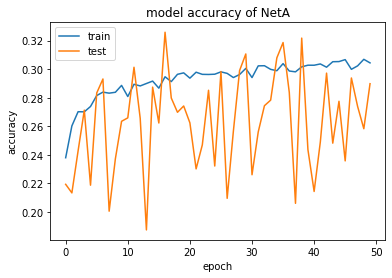

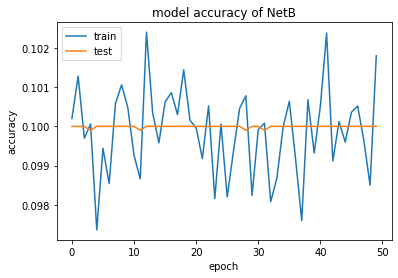

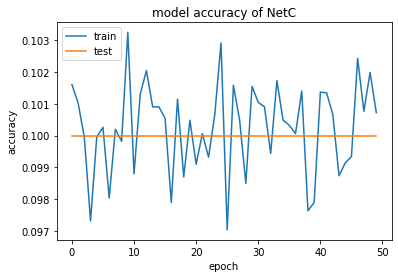

In [ ]:
train_and_plot(model_histories,Test_accuracies,Model_names)

In [ ]:
Original_image = trainX[5].

ValueError: ignored